In [29]:
# Add parent directory to current path
import os.path
import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.insert(0,p)

In [30]:
%load_ext autoreload
%autoreload 2

from research.ml.gaussian_process import GaussianProcess
from research.ml.kernel import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


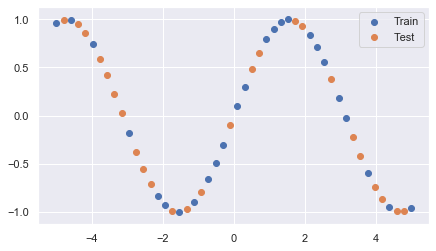

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')
sns.set(style="darkgrid")

 
# Generate dataset
N = 50
X = np.linspace(-5, 5, N).reshape(-1, 1)
y = np.sin(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

# Plot data
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.scatter(X_train, y_train, label='Train')
ax.scatter(X_test, y_test, label='Test')
ax.legend()
pass

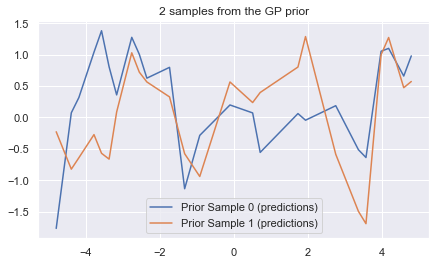

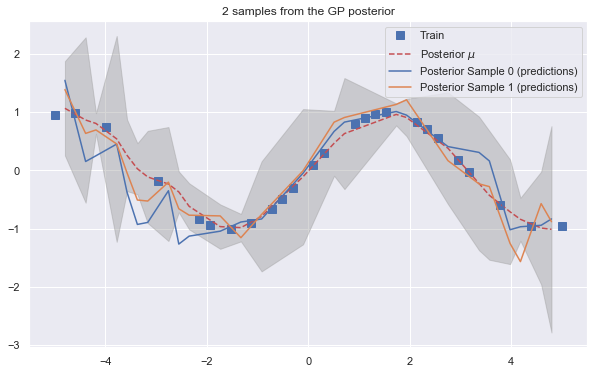

In [32]:
k = GaussianKernel(pairwise=True, radius=.1)
gp = GaussianProcess(k)

gp.fit(X_train, y_train)

gp.predict(X_test)

fig, axes = gp.plot_prior_samples(X_test, 2)

fig, axes = gp.plot_posterior_samples(X_test, 2)